In [1]:
from time import time

import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt
import nltk

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import NMF
from scipy.stats import kurtosis

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
#Importing the training dataset
trainSet  = pd.read_csv('train.csv')
#Encoding the dataset 
trainingEncoded = pd.get_dummies(trainSet)
x = trainingEncoded.drop(['hand'], axis=1)
y = trainingEncoded['hand']
#Splitting the datasets to independent training and test splits for later use (randomly)
xTrain, xVal, yTrain, yVal = train_test_split(x, 
                                              y,
                                              test_size=.1)

np.random.seed(42)

n_samples, n_features = x.shape
n_classes = len(np.unique(y.values.tolist()))
labels = y.values.tolist()
sample_size = 4175

### RUN EVERYTHING TILL HERE ###

In [144]:
# Procedure 1
KList = [1, 5, 10, 15, 20, 30, 40, 50, 100, 200, 400, 800, 1600, 3200]
# KList = [6400]
print('init\t\tK\thomo\tcompl\tv-meas\tARI\tAMI')
for i in KList:   
    clu = KMeans(init='k-means++', n_clusters=i,n_init=10, max_iter = 10000)
    # X_reduced = dra.fit_transform(myOriginalDataX)
    clu.fit(x)
    predictions = clu.predict(x)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))
for i in KList:  
    clu = KMeans(init='random', n_clusters=i, n_init=10, max_iter = 10000)
    clu.fit(x)
    predictions = clu.predict(x)
    print('random\t\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

init		K	homo	compl	v-meas	ARI	AMI
kmeans++	1	0.000	1.000	0.000	0.000	0.000	
kmeans++	5	0.002	0.001	0.002	0.000	0.001	
kmeans++	10	0.007	0.003	0.004	0.001	0.002	
kmeans++	15	0.025	0.009	0.014	0.004	0.008	
kmeans++	20	0.031	0.010	0.015	0.003	0.009	
kmeans++	30	0.029	0.008	0.013	0.002	0.007	
kmeans++	40	0.040	0.011	0.017	0.002	0.009	
kmeans++	50	0.040	0.010	0.016	0.002	0.008	
kmeans++	100	0.051	0.011	0.018	0.001	0.008	
kmeans++	200	0.074	0.014	0.023	0.001	0.009	
kmeans++	400	0.103	0.017	0.029	0.000	0.010	
kmeans++	800	0.139	0.021	0.036	0.000	0.010	
kmeans++	1600	0.187	0.025	0.044	0.000	0.008	
kmeans++	3200	0.275	0.034	0.060	0.000	0.009	
random		1	0.000	1.000	0.000	0.000	0.000	
random		5	0.002	0.001	0.001	0.000	0.001	
random		10	0.006	0.003	0.004	0.001	0.002	
random		15	0.009	0.003	0.005	0.001	0.002	
random		20	0.025	0.008	0.012	0.003	0.007	
random		30	0.035	0.010	0.016	0.002	0.009	
random		40	0.040	0.011	0.017	0.002	0.009	
random		50	0.042	0.011	0.017	0.002	0.009	
random		100	0.052	0.011	

In [3]:
# Procedure 1
KList = [1, 5, 10, 15, 20, 30, 40, 50]
print('init\t\tK\thomo\tcompl\tv-meas\tARI\tAMI')
for i in KList:   
    clu = GaussianMixture(init_params='kmeans', n_components=i,n_init=10, max_iter = 10000)
    clu.fit(x)
    predictions = clu.predict(x)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))
for i in KList:  
    clu = GaussianMixture(init_params='random', n_components=i, n_init=10, max_iter = 10000)
    clu.fit(x)
    predictions = clu.predict(x)
    print('random\t\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

init		K	homo	compl	v-meas	ARI	AMI
kmeans++	1	0.000	1.000	0.000	0.000	0.000	
kmeans++	5	0.004	0.002	0.003	0.002	0.002	
kmeans++	10	0.005	0.002	0.003	0.001	0.001	
kmeans++	15	0.013	0.005	0.007	0.002	0.004	
kmeans++	20	0.013	0.004	0.007	0.001	0.003	
kmeans++	30	0.015	0.005	0.007	0.001	0.003	
kmeans++	40	0.008	0.003	0.004	-0.000	0.001	
kmeans++	50	0.010	0.003	0.005	0.001	0.001	
random		1	0.000	1.000	0.000	0.000	0.000	
random		5	0.001	0.001	0.001	0.000	0.000	
random		10	0.005	0.002	0.003	0.000	0.002	
random		15	0.006	0.002	0.003	0.001	0.001	
random		20	0.007	0.003	0.004	0.000	0.001	
random		30	0.009	0.003	0.004	0.000	0.001	
random		40	0.012	0.003	0.005	0.000	0.002	
random		50	0.014	0.004	0.006	0.000	0.002	


In [4]:
# Procedure 2
pca = PCA(n_components = 2)
ica = FastICA(n_components = 2)
rp = GaussianRandomProjection(n_components = 2)
nmf = NMF(n_components =2 )

pca_x = pca.fit_transform(x)
ica_x = ica.fit_transform(x)
rp_x = rp.fit_transform(x)
nmf_x = nmf.fit_transform(x)

/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


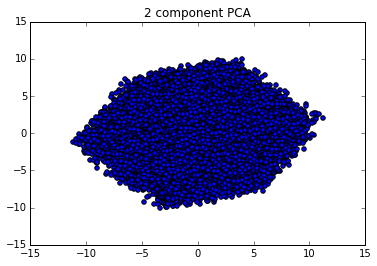

In [15]:
xplot = []
yplot = []
for item in pca_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component PCA")
plt.scatter(xplot, yplot)

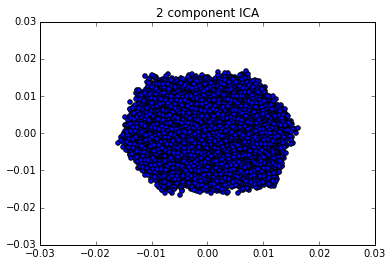

In [16]:
xplot = []
yplot = []
for item in ica_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component ICA")
plt.scatter(xplot, yplot)

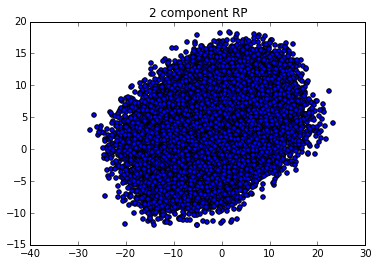

In [17]:
xplot = []
yplot = []
for item in rp_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component RP")
plt.scatter(xplot, yplot)

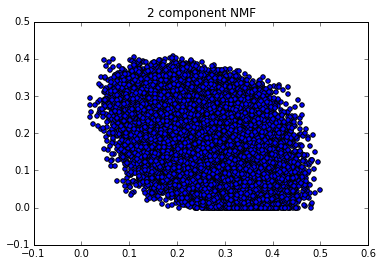

In [18]:
xplot = []
yplot = []
for item in nmf_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component NMF")
plt.scatter(xplot, yplot)

In [163]:
#Procedure 3
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.007	0.002	0.004	-0.001	0.001	
kmeans++	2	0.017	0.006	0.009	0.000	0.005	
kmeans++	3	0.019	0.006	0.009	0.001	0.005	
kmeans++	4	0.009	0.003	0.004	0.001	0.002	
kmeans++	5	0.033	0.011	0.016	0.003	0.010	
kmeans++	6	0.025	0.008	0.012	0.003	0.007	
kmeans++	7	0.025	0.008	0.013	0.003	0.007	
kmeans++	8	0.027	0.009	0.013	0.003	0.008	
kmeans++	9	0.026	0.009	0.013	0.003	0.008	
kmeans++	10	0.029	0.010	0.015	0.003	0.009	


In [164]:
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu =  KMeans(init='random', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

random	1	0.007	0.002	0.003	-0.001	0.001	
random	2	0.016	0.005	0.008	0.000	0.004	
random	3	0.018	0.006	0.009	0.001	0.005	
random	4	0.038	0.013	0.019	0.003	0.011	
random	5	0.026	0.009	0.013	0.003	0.007	
random	6	0.025	0.008	0.012	0.003	0.007	
random	7	0.026	0.009	0.013	0.003	0.007	
random	8	0.028	0.009	0.014	0.003	0.008	
random	9	0.028	0.009	0.014	0.003	0.008	
random	10	0.029	0.010	0.014	0.003	0.008	


In [165]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

kmeans++	1	0.007	0.002	0.003	-0.001	0.001	-1.319
kmeans++	2	0.017	0.005	0.008	0.000	0.004	-1.186
kmeans++	3	0.021	0.007	0.010	0.001	0.006	-1.168
kmeans++	4	0.010	0.003	0.005	0.001	0.002	-1.240
kmeans++	5	0.029	0.010	0.014	0.003	0.008	-1.178
kmeans++	6	0.019	0.006	0.009	0.002	0.005	-1.202
kmeans++	7	0.016	0.005	0.008	0.001	0.004	-1.233
kmeans++	8	0.013	0.004	0.006	0.001	0.003	-1.205
kmeans++	9	0.012	0.004	0.006	0.001	0.003	-1.231
kmeans++	10	0.006	0.002	0.003	0.000	0.001	-1.207


In [166]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu =  KMeans(init='random', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

random	1	0.007	0.002	0.004	-0.001	0.001	-0.836
random	2	0.018	0.006	0.009	0.000	0.005	-1.266
random	3	0.017	0.005	0.008	0.001	0.004	-1.203
random	4	0.011	0.004	0.006	0.001	0.003	-1.205
random	5	0.029	0.009	0.014	0.003	0.008	-1.182
random	6	0.018	0.006	0.009	0.002	0.005	-1.219
random	7	0.015	0.005	0.007	0.001	0.004	-1.174
random	8	0.011	0.004	0.006	0.001	0.003	-1.201
random	9	0.006	0.002	0.003	0.000	0.001	-1.210
random	10	0.007	0.002	0.004	0.000	0.001	-1.225


In [167]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.005	0.002	0.003	-0.001	0.001	
kmeans++	2	0.004	0.001	0.002	-0.000	0.000	
kmeans++	3	0.010	0.003	0.005	0.000	0.002	
kmeans++	4	0.007	0.002	0.004	-0.000	0.001	
kmeans++	5	0.016	0.005	0.008	0.001	0.004	
kmeans++	6	0.019	0.006	0.009	0.002	0.005	
kmeans++	7	0.017	0.006	0.008	0.001	0.004	
kmeans++	8	0.014	0.005	0.007	0.001	0.004	
kmeans++	9	0.023	0.008	0.011	0.002	0.006	
kmeans++	10	0.015	0.005	0.007	0.001	0.004	


In [168]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu =  KMeans(init='random', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
        % (i, metrics.homogeneity_score(y, predictions),
        metrics.completeness_score(y, predictions),
        metrics.v_measure_score(y, predictions),
        metrics.adjusted_rand_score(y, predictions),
        metrics.adjusted_mutual_info_score(y, predictions)))

random	1	0.003	0.001	0.002	0.000	0.000	
random	2	0.018	0.006	0.009	0.003	0.005	
random	3	0.011	0.004	0.006	0.001	0.003	
random	4	0.019	0.006	0.010	0.002	0.005	
random	5	0.010	0.003	0.005	0.000	0.002	
random	6	0.013	0.004	0.006	0.000	0.003	
random	7	0.013	0.004	0.006	0.001	0.003	
random	8	0.016	0.005	0.008	0.001	0.004	
random	9	0.017	0.006	0.009	0.001	0.005	
random	10	0.022	0.007	0.011	0.002	0.006	


In [169]:
for i in range(1, 11):
    dra = NMF(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.039	0.014	0.020	0.007	0.012	
kmeans++	2	0.028	0.009	0.014	0.004	0.008	
kmeans++	3	0.021	0.007	0.011	0.002	0.006	
kmeans++	4	0.025	0.008	0.013	0.002	0.007	
kmeans++	5	0.029	0.009	0.014	0.003	0.008	
kmeans++	6	0.029	0.009	0.014	0.003	0.008	
kmeans++	7	0.024	0.008	0.012	0.002	0.007	
kmeans++	8	0.027	0.009	0.013	0.003	0.008	
kmeans++	9	0.028	0.009	0.014	0.003	0.008	
kmeans++	10	0.017	0.005	0.008	0.001	0.004	


In [170]:
for i in range(1, 11):
    dra = NMF(n_components=i)
    clu =  KMeans(init='random', n_clusters=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
        % (i, metrics.homogeneity_score(y, predictions),
        metrics.completeness_score(y, predictions),
        metrics.v_measure_score(y, predictions),
        metrics.adjusted_rand_score(y, predictions),
        metrics.adjusted_mutual_info_score(y, predictions)))

random	1	0.038	0.013	0.019	0.007	0.012	
random	2	0.028	0.009	0.014	0.004	0.008	
random	3	0.024	0.008	0.012	0.002	0.007	
random	4	0.025	0.008	0.012	0.002	0.007	
random	5	0.025	0.008	0.012	0.002	0.007	
random	6	0.023	0.008	0.012	0.002	0.007	
random	7	0.022	0.007	0.011	0.002	0.006	
random	8	0.025	0.008	0.012	0.002	0.007	
random	9	0.023	0.008	0.011	0.003	0.007	
random	10	0.007	0.002	0.003	0.000	0.001	


In [171]:
#Procedure 3
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.009	0.003	0.004	-0.000	0.001	
kmeans++	2	0.021	0.006	0.010	0.000	0.005	
kmeans++	3	0.021	0.006	0.010	0.001	0.005	
kmeans++	4	0.040	0.012	0.018	0.002	0.010	
kmeans++	5	0.014	0.004	0.007	0.001	0.003	
kmeans++	6	0.013	0.004	0.006	0.001	0.003	
kmeans++	7	0.008	0.003	0.004	-0.000	0.001	
kmeans++	8	0.017	0.005	0.008	0.002	0.004	
kmeans++	9	0.017	0.005	0.008	0.002	0.004	
kmeans++	10	0.017	0.005	0.008	0.001	0.004	


In [172]:
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

random	1	0.004	0.003	0.003	-0.007	0.002	
random	2	0.008	0.004	0.005	0.000	0.003	
random	3	0.011	0.005	0.007	-0.001	0.003	
random	4	0.009	0.004	0.005	-0.005	0.002	
random	5	0.017	0.006	0.009	0.000	0.004	
random	6	0.016	0.005	0.008	0.002	0.004	
random	7	0.013	0.004	0.006	0.000	0.003	
random	8	0.014	0.005	0.007	0.002	0.003	
random	9	0.010	0.003	0.005	0.000	0.001	
random	10	0.009	0.003	0.004	0.000	0.001	


In [148]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

kmeans++	1	0.009	0.003	0.004	-0.001	0.001	-1.140
kmeans++	2	0.020	0.006	0.009	0.000	0.005	-1.308
kmeans++	3	0.023	0.007	0.010	0.000	0.005	-1.171
kmeans++	4	0.043	0.013	0.019	0.003	0.011	-1.226
kmeans++	5	0.035	0.010	0.016	0.003	0.009	-1.212
kmeans++	6	0.025	0.007	0.011	0.002	0.006	-1.233
kmeans++	7	0.021	0.006	0.009	0.002	0.005	-1.260
kmeans++	8	0.015	0.004	0.007	0.001	0.003	-1.235
kmeans++	9	0.012	0.003	0.005	0.001	0.002	-1.286
kmeans++	10	0.009	0.003	0.004	0.000	0.001	-0.844


In [149]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

random	1	0.002	0.002	0.002	-0.003	0.002	-0.529
random	2	0.010	0.005	0.007	-0.004	0.004	-1.236
random	3	0.007	0.003	0.005	-0.004	0.002	-0.835
random	4	0.010	0.004	0.006	-0.003	0.003	-1.178
random	5	0.016	0.006	0.009	0.001	0.004	-1.038
random	6	0.013	0.004	0.006	-0.000	0.003	-1.137
random	7	0.015	0.005	0.007	-0.000	0.003	-1.296
random	8	0.015	0.005	0.007	0.002	0.003	-1.231
random	9	0.010	0.003	0.005	0.001	0.002	-1.115
random	10	0.010	0.003	0.004	-0.000	0.001	-1.132


In [150]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.025	0.007	0.011	0.003	0.006	
kmeans++	2	0.008	0.002	0.004	-0.000	0.001	
kmeans++	3	0.009	0.003	0.004	-0.000	0.001	
kmeans++	4	0.010	0.003	0.005	0.000	0.001	
kmeans++	5	0.023	0.007	0.011	0.002	0.005	
kmeans++	6	0.014	0.004	0.006	0.001	0.003	
kmeans++	7	0.014	0.004	0.007	0.000	0.003	
kmeans++	8	0.014	0.004	0.006	0.001	0.003	
kmeans++	9	0.016	0.005	0.008	0.001	0.003	
kmeans++	10	0.007	0.002	0.004	-0.000	0.001	


In [152]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
      % (i, metrics.homogeneity_score(y, predictions),
      metrics.completeness_score(y, predictions),
      metrics.v_measure_score(y, predictions),
      metrics.adjusted_rand_score(y, predictions),
      metrics.adjusted_mutual_info_score(y, predictions)))

random	1	0.001	0.001	0.001	0.003	0.001	
random	2	0.004	0.002	0.002	-0.001	0.001	
random	3	0.005	0.002	0.003	0.001	0.001	
random	4	0.008	0.003	0.004	-0.001	0.001	
random	5	0.014	0.005	0.007	0.001	0.003	
random	6	0.012	0.004	0.006	0.000	0.003	
random	7	0.012	0.004	0.006	0.001	0.002	
random	8	0.012	0.004	0.006	0.001	0.002	
random	9	0.008	0.003	0.004	0.001	0.001	
random	10	0.011	0.003	0.005	0.000	0.002	


In [153]:
for i in range(1, 11):
    dra = NMF(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.041	0.013	0.019	0.006	0.011	
kmeans++	2	0.033	0.010	0.015	0.003	0.008	
kmeans++	3	0.015	0.005	0.007	0.001	0.003	
kmeans++	4	0.015	0.005	0.007	0.001	0.003	
kmeans++	5	0.014	0.004	0.007	0.002	0.003	
kmeans++	6	0.010	0.003	0.005	0.000	0.002	
kmeans++	7	0.017	0.005	0.008	0.001	0.004	
kmeans++	8	0.013	0.004	0.006	0.001	0.003	
kmeans++	9	0.012	0.004	0.006	0.001	0.002	
kmeans++	10	0.006	0.002	0.003	0.001	0.001	


In [155]:
for i in range(1, 11):
    dra = NMF(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=30,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
        % (i, metrics.homogeneity_score(y, predictions),
        metrics.completeness_score(y, predictions),
        metrics.v_measure_score(y, predictions),
        metrics.adjusted_rand_score(y, predictions),
        metrics.adjusted_mutual_info_score(y, predictions)))

random	1	0.024	0.022	0.023	0.042	0.021	
random	2	0.011	0.008	0.009	0.007	0.007	
random	3	0.019	0.008	0.011	0.002	0.007	
random	4	0.018	0.007	0.010	0.004	0.006	
random	5	0.015	0.005	0.008	0.000	0.004	
random	6	0.014	0.005	0.007	0.002	0.003	
random	7	0.015	0.005	0.007	0.001	0.003	
random	8	0.013	0.004	0.006	-0.001	0.002	
random	9	0.014	0.004	0.006	0.001	0.003	
random	10	0.008	0.002	0.004	0.000	0.001	


In [ ]:
# Procedure 4
xTrain, xVal, yTrain, yVal = train_test_split(x, 
                                              y,
                                              test_size=.1)

pca = PCA(n_components = 5)
ica = FastICA(n_components = 5)
rp = GaussianRandomProjection(n_components = 9)
nmf = NMF(n_components = 1)

pca = pca.fit(xTrain)
ica = ica.fit(xTrain)
rp = rp.fit(xTrain)
nmf = nmf.fit(xTrain)

pca_xTrain = pca.transform(xTrain)
pca_xTest = pca.transform(xVal)
ica_xTrain = ica.transform(xTrain)
ica_xTest = ica.transform(xVal)
rp_xTrain = rp.transform(xTrain)
rp_xTest = rp.transform(xVal)
nmf_xTrain = nmf.transform(xTrain)
nmf_xTest = nmf.transform(xVal)

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = pca_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(pca_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(pca_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("PCA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = ica_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(ica_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(ica_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("ICA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = rp_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(rp_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(rp_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("RP Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = nmf_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(nmf_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(nmf_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("NMF Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# Procedure 5
kmeans = KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(pca_xTrain)
em = em.fit(pca_xTrain)

kmeans_xTrain = kmeans.transform(pca_xTrain)
kmeans_xTest = kmeans.transform(pca_xTest)
em_xTrain = em.predict_proba(pca_xTrain)
em_xTest = em.predict_proba(pca_xTest)

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("KMeans-PCA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("EM-PCA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(ica_xTrain)
em = em.fit(ica_xTrain)

kmeans_xTrain = kmeans.transform(ica_xTrain)
kmeans_xTest = kmeans.transform(ica_xTest)
em_xTrain = em.predict_proba(ica_xTrain)
em_xTest = em.predict_proba(ica_xTest)

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("KMeans-ICA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("EM-ICA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(rp_xTrain)
em = em.fit(rp_xTrain)

kmeans_xTrain = kmeans.transform(rp_xTrain)
kmeans_xTest = kmeans.transform(rp_xTest)
em_xTrain = em.predict_proba(rp_xTrain)
em_xTest = em.predict_proba(rp_xTest)

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("KMeans-RP Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("EM-RP Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=20,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=30,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(nmf_xTrain)
em = em.fit(nmf_xTrain)

kmeans_xTrain = kmeans.transform(nmf_xTrain)
kmeans_xTest = kmeans.transform(nmf_xTest)
em_xTrain = em.predict_proba(nmf_xTrain)
em_xTest = em.predict_proba(nmf_xTest)

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("KMeans-NMF Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [ ]:
# TRAIN TEST ERROR MEASURER #### RUN THIS #####
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 6):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 5:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/5.0)
    
    
    mlp = MLPClassifier(max_iter = 300, hidden_layer_sizes = (500,), learning_rate="constant", activation='relu', alpha =0.0008)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(22509 * i / 5.0)
    

plt.figure()
plt.title("EM-NMF Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")